In [10]:
def convert_files(sampling_file, command_file):

    if command_file.endswith("000"):
        print(command_file[-5:])

    with open(sampling_file, "r") as f:
        lines = f.readlines()

    if len(lines) < 200:
        return None

    X1 = [[int(l) for l in line[:-1]] for line in lines[::2]]  #first chromosome
    X2 = [[int(l) for l in line[:-1]] for line in lines[1::2]] #second chromosome

    with open(command_file, "r") as f:
        s = f.readlines()[0].split()

    command_idx = [6,7,10,11]
    points = [float(s[idx]) for idx in command_idx]
    ind11, ind12, ind22, ind21 = [round(1000*point - 0.5) for point in points]
    # indAB: A is pair number and B is chromosome number

    site11 = [sample[ind11] for sample in X1]
    site12 = [sample[ind12] for sample in X2]
    site21 = [sample[ind21] for sample in X1]
    site22 = [sample[ind22] for sample in X2]

    for offset in range(1, sample_width // 2 + 1):
        site_prev = [sample[ind11 - offset] for sample in X1] if ind11 - offset >= 0 else [1 for _ in range(len(X1))]
        site_next = [sample[ind11 + offset] for sample in X1] if ind11 + offset < num_samples else [1 for _ in range(len(X1))]
        site11 = site_prev + site11 + site_next

        site_prev = [sample[ind12 - offset] for sample in X2] if ind12 - offset >= 0 else [1 for _ in range(len(X2))]
        site_next = [sample[ind12 + offset] for sample in X2] if ind12 + offset < num_samples else [1 for _ in range(len(X2))]
        site12 = site_prev + site12 + site_next

        site_prev = [sample[ind21 - offset] for sample in X1] if ind21 - offset >= 0 else [1 for _ in range(len(X1))]
        site_next = [sample[ind21 + offset] for sample in X1] if ind21 + offset < num_samples else [1 for _ in range(len(X1))]
        site21 = site_prev + site21 + site_next

        site_prev = [sample[ind22 - offset] for sample in X2] if ind22 - offset >= 0 else [1 for _ in range(len(X2))]
        site_next = [sample[ind22 + offset] for sample in X2] if ind22 + offset < num_samples else [1 for _ in range(len(X2))]
        site22 = site_prev + site22 + site_next

    return [site11, site12, site21, site22]

In [11]:
num_files = 50_000
data_dir = "../Data6"
sample_width = 55
num_samples = 500

X = [convert_files(data_dir + "/sampled_genotypes/sample_" + str(i), data_dir + "/commands/command_" + str(i)) for i in range(num_files)]



_1000
_2000
_3000
_4000
_5000
_6000
_7000
_8000
_9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


In [17]:
import torch
X = [x for x in X if x is not None]
X = torch.tensor(X) - 1 


In [18]:
X.shape

torch.Size([49820, 4, 5500])

In [23]:
X = X.reshape(X.shape[0], X.shape[1], sample_width, 100)
Xsum = X.sum(dim=2)

In [31]:
import matplotlib.pyplot as plt

def plotter(site, width):
    Xsubset = Xsum[:,site,27 - width // 2: 27 + width //2 + 1].sum(dim=1)
    
    plt.hist(Xsubset,50)
    plt.show()

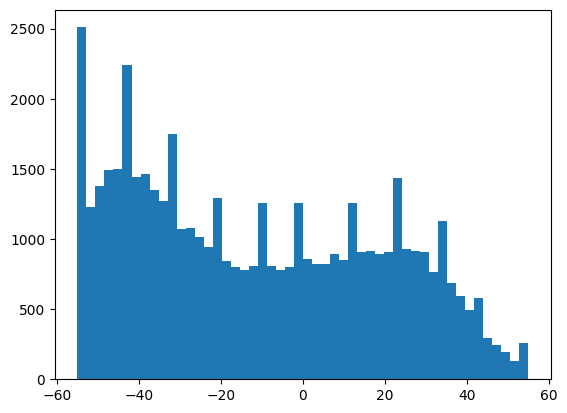

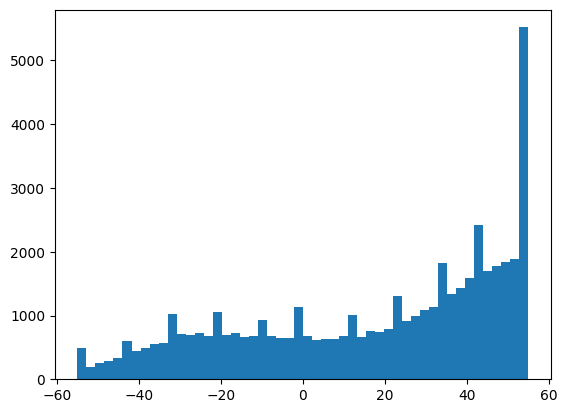

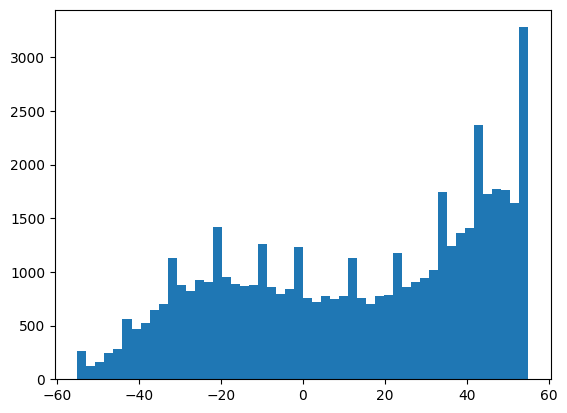

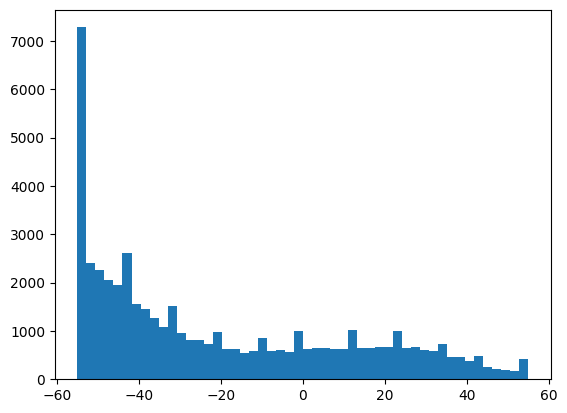

In [34]:
plotter(0,1)
plotter(1,1)
plotter(2,1)
plotter(3,1)